In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

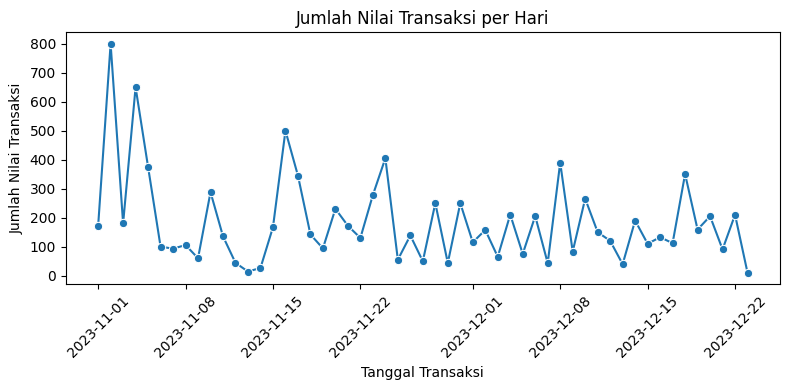

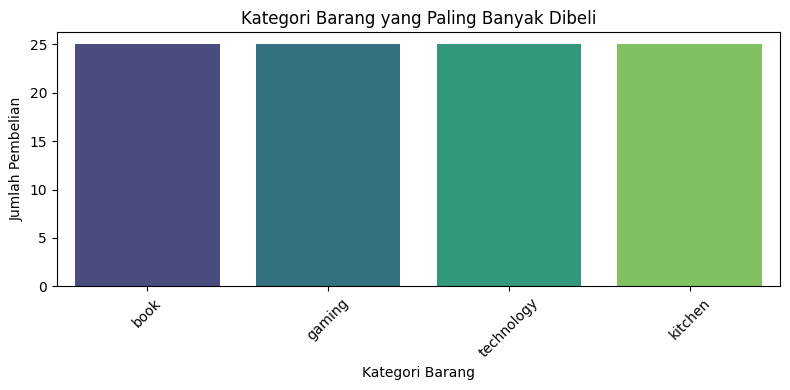

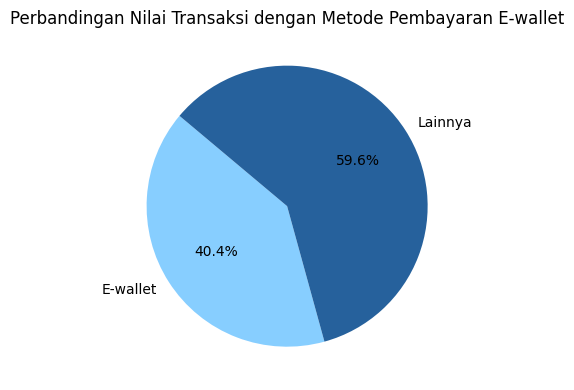

Nilai transaksi maksimal: 800.0
Nilai transaksi minimal: 5.0
Nilai transaksi median: 47.5


In [13]:
#prioritas 2 no 1
url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
df = pd.read_json(url)

df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

#jumlah nilai transaksi per hari
daily_transaction_amount = df.groupby(df['transaction_date'].dt.date)['transaction_amount'].sum().reset_index()
daily_transaction_amount.columns = ['transaction_date', 'total_transaction_amount']
plt.figure(figsize=(8, 4))
sns.lineplot(x='transaction_date', y='total_transaction_amount', data=daily_transaction_amount, marker='o')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal Transaksi')
plt.ylabel('Jumlah Nilai Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#kategori barang yang paling banyak dibeli
item_category_counts = df['item_category'].value_counts().reset_index()
item_category_counts.columns = ['item_category', 'counts']
plt.figure(figsize=(8, 4))
sns.barplot(x='item_category', y='counts', data=item_category_counts, palette='viridis', hue='item_category', dodge=False, legend=False)
plt.title('Kategori Barang yang Paling Banyak Dibeli')
plt.xlabel('Kategori Barang')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#jumlah nilai transaksi dengan metode pembayaran e-wallet
e_wallet_transactions = df[df['payment_method'] == 'e wallet']['transaction_amount'].sum()
plt.figure(figsize=(4, 4))
plt.pie([e_wallet_transactions, df['transaction_amount'].sum() - e_wallet_transactions], 
        labels=['E-wallet', 'Lainnya'], autopct='%1.1f%%', startangle=140, colors=['#87CEFF', '#26619C'])
plt.title('Perbandingan Nilai Transaksi dengan Metode Pembayaran E-wallet')
plt.axis('equal')
plt.tight_layout()
plt.show()

#nilai maksimal, nilai minimal dan nilai tengah dari jumlah nilai transaksi
max_transaction = df['transaction_amount'].max()
min_transaction = df['transaction_amount'].min()
median_transaction = df['transaction_amount'].median()
print(f"Nilai transaksi maksimal: {max_transaction}")
print(f"Nilai transaksi minimal: {min_transaction}")
print(f"Nilai transaksi median: {median_transaction}")

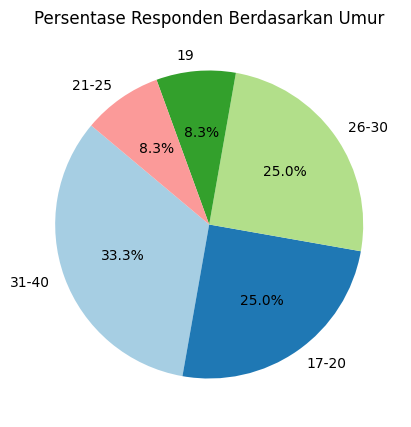

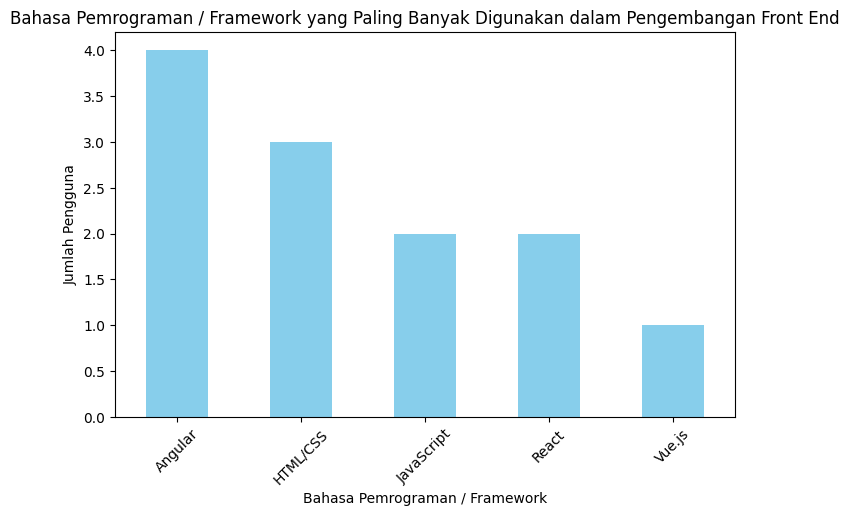

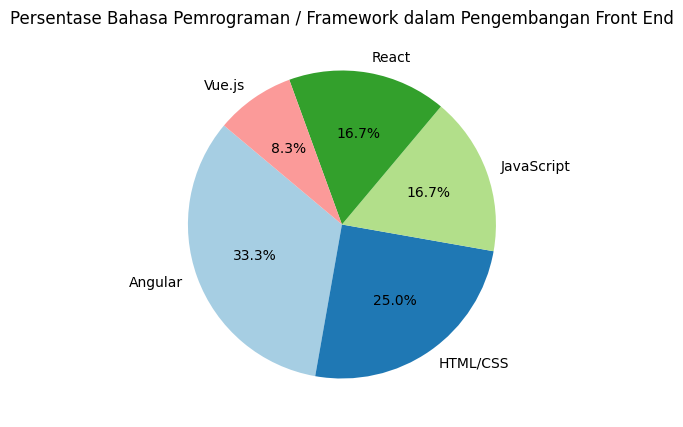

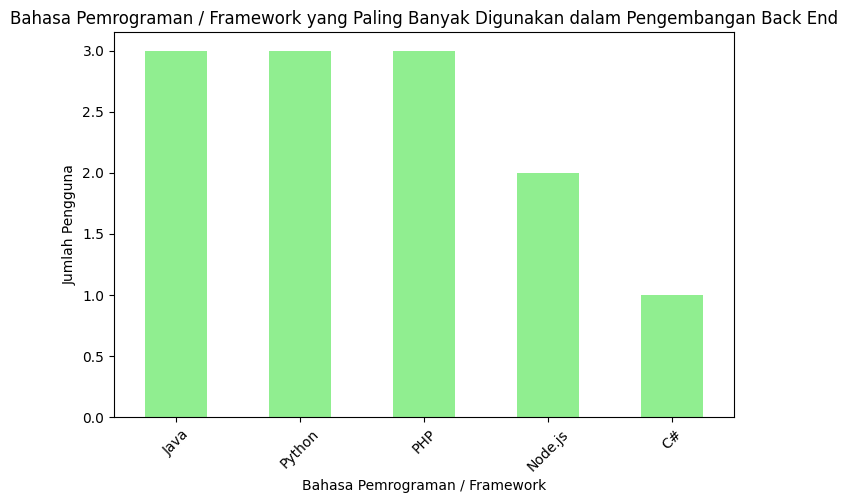

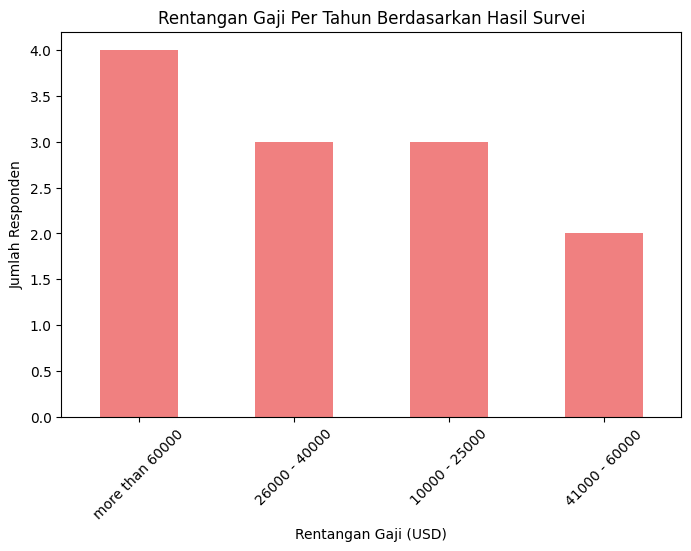

In [11]:
#prioritas 2 no 2
df = pd.read_csv('survey.csv')

#cleaning
df = df.drop_duplicates()
df.replace("-", pd.NA, inplace=True)
df.dropna(inplace=True)

#persentase responden berdasarkan umur
age_counts = df['age'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Persentase Responden Berdasarkan Umur')
plt.ylabel('')
plt.show()

#bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan front end
front_end_counts = df['favorite_front_end'].value_counts()
plt.figure(figsize=(8, 5))
front_end_counts.plot(kind='bar', color='skyblue')
plt.title('Bahasa Pemrograman / Framework yang Paling Banyak Digunakan dalam Pengembangan Front End')
plt.xlabel('Bahasa Pemrograman / Framework')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

#persentase bahasa pemrograman / framework yang dipilih dalam pengembangan front end
front_end_percentages = df['favorite_front_end'].value_counts(normalize=True) * 8
plt.figure(figsize=(8, 5))
front_end_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Persentase Bahasa Pemrograman / Framework dalam Pengembangan Front End')
plt.ylabel('')
plt.show()

#bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan back end
back_end_counts = df['favorite_back_end'].value_counts()
plt.figure(figsize=(8, 5))
back_end_counts.plot(kind='bar', color='lightgreen')
plt.title('Bahasa Pemrograman / Framework yang Paling Banyak Digunakan dalam Pengembangan Back End')
plt.xlabel('Bahasa Pemrograman / Framework')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

#rentangan gaji per tahun yang paling banyak berdasarkan hasil survei
salary_counts = df['salary_per_year_in_USD'].value_counts()
plt.figure(figsize=(8, 5))
salary_counts.plot(kind='bar', color='lightcoral')
plt.title('Rentangan Gaji Per Tahun Berdasarkan Hasil Survei')
plt.xlabel('Rentangan Gaji (USD)')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45)
plt.show()
